# Titanic Survival Prediction Model

In [2]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/work/TITANIC SURVIVAL PREDICTION/Titanic-Dataset.csv")

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
print(data.head())

print(data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

# Visualizing the Data

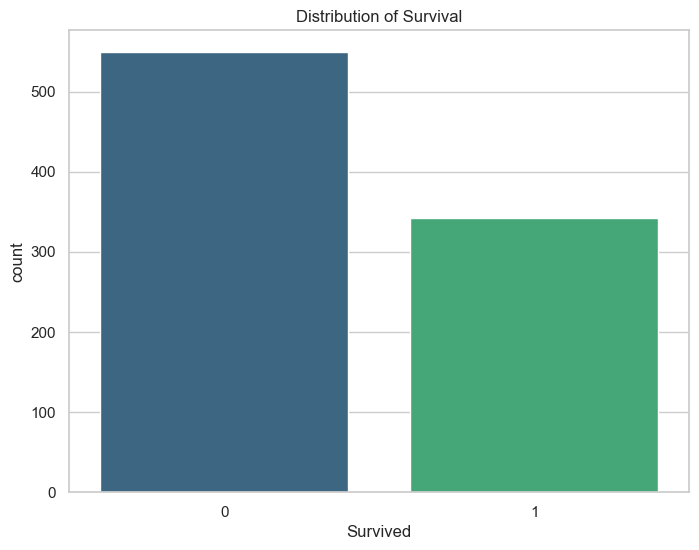

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting the distribution of survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Distribution of Survival')
plt.show()


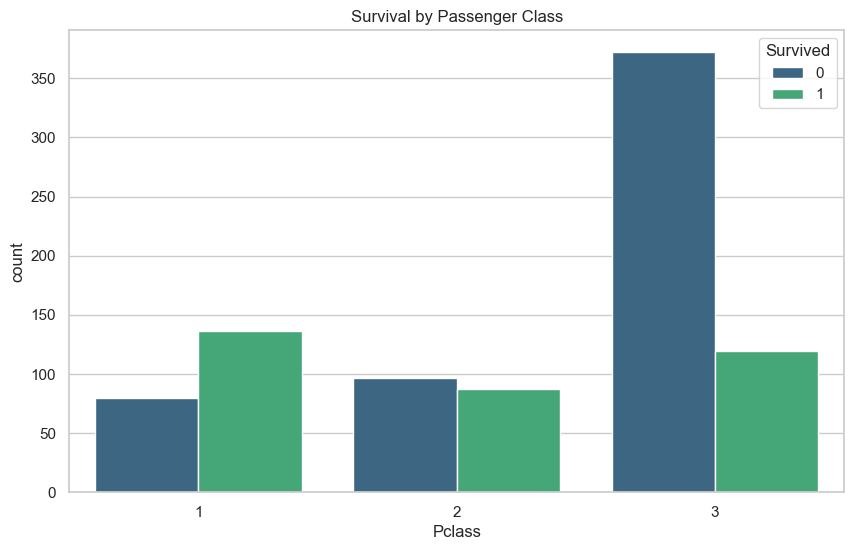

In [47]:
# Plotting the distribution of passengers by class and survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title('Survival by Passenger Class')
plt.show()


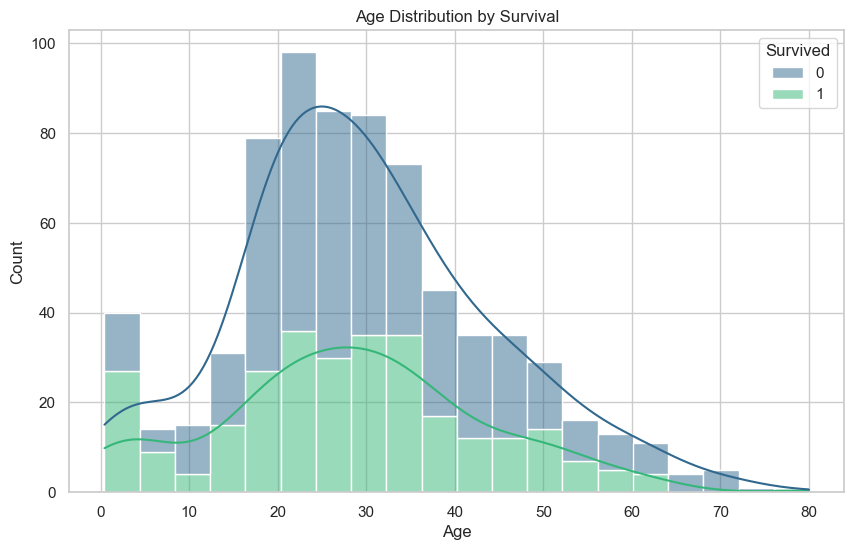

In [48]:
# Plotting the distribution of age and survival
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Survived', multiple='stack', palette='viridis', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


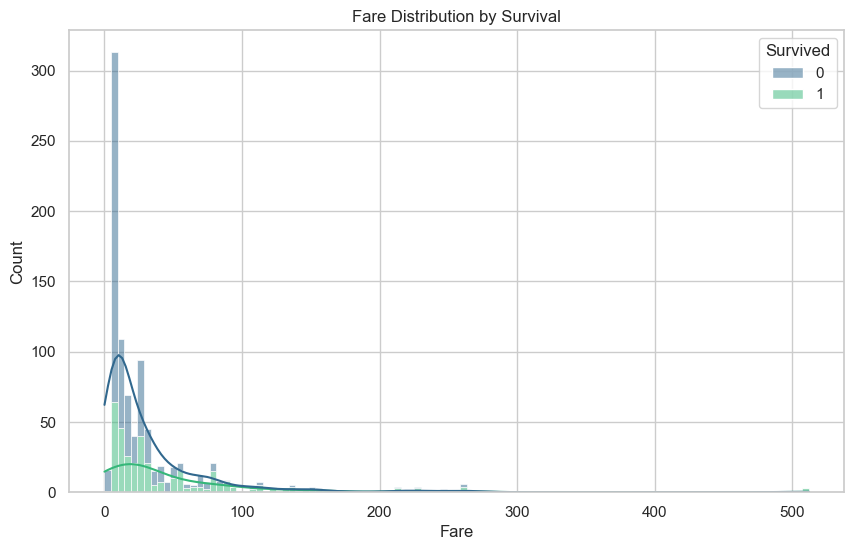

In [49]:
# Plotting the distribution of fare and survival
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Fare', hue='Survived', multiple='stack', palette='viridis', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

# Preprocessing the Data

In [50]:
# Filling missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Filling missing values for 'Embarked' with the most common embarkation point
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Filling missing values for 'Fare' with the median fare
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Droping 'Cabin' due to many missing values
data.drop(columns=['Cabin'], inplace=True)

# Converting categorical columns to numerical
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Droping columns that won't be used
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

print(data.head())
print(data.isnull().sum()) 


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Splitting the Data into Training and Testing Sets

In [51]:
from sklearn.model_selection import train_test_split

# Defining the feature columns and the target column
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(712, 8) (179, 8)


# Building and Training a Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initializimg the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluating the Model's Performance

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.82
Precision: 0.80
Recall: 0.76
F1 Score: 0.78


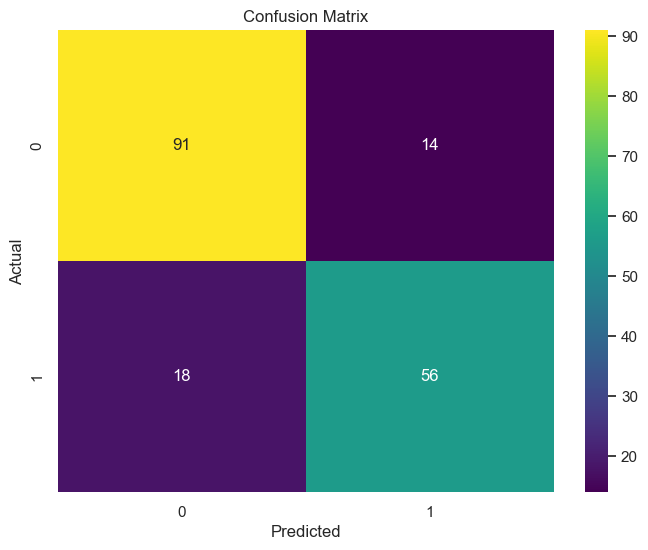

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [54]:
# Displaying confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying classification report
print(classification_report(y_test, y_pred))


In [55]:
# Example prediction (using the first row of the test set)
sample = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample)
print(f'Prediction (0 = Not Survived, 1 = Survived): {prediction[0]}')

Prediction (0 = Not Survived, 1 = Survived): 0
